In [1]:
from trustyai.hap import TMaRCo

import matplotlib.pyplot as plt
from transformers import pipeline, Conversation

In [2]:
converse = pipeline("conversational", model="microsoft/DialoGPT-large")
prompt1 = "name a racist movie"
conversation_1 = Conversation(prompt1)
llm_out1 = converse([conversation_1])
print(llm_out1)
llm_out1_text = llm_out1.generated_responses[0]
prompt2 = f"why is the movie '{llm_out1_text}' considered racist?"
conversation_2 = Conversation(prompt2)
llm_out2 = converse([conversation_2])
llm_out2

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


Conversation id: cec9bc0f-a98b-44fb-a2b2-d26e358accc6 
user >> name a racist movie 
bot >> The Departed 


Conversation id: f31e6836-8e21-4ff6-9fc3-cda317afda9f 
user >> why is the movie 'The Departed' considered racist? 
bot >> Because it's a racial slur. 

In [11]:
text = prompt1 + ': ' + llm_out1.generated_responses[0] + '. ' + prompt2 + ': ' + llm_out2.generated_responses[0]
text

"name a racist movie: The Departed. why is the movie 'The Departed' considered racist?: Because it's a racial slur."

In [4]:
tmarco = TMaRCo()

In [5]:
def to_dict(t, s):
    sd = dict()
    ts = tmarco.tokenizer.tokenize(t)
    for idx in range(len(ts)):
        sd[ts[idx][1:]] = s[idx]
    return sd

In [6]:
tmarco.load_models(["trustyai/gminus", "trustyai/gplus"])

In [12]:
scores = tmarco.score(text)
scores_dict = to_dict(text, scores)

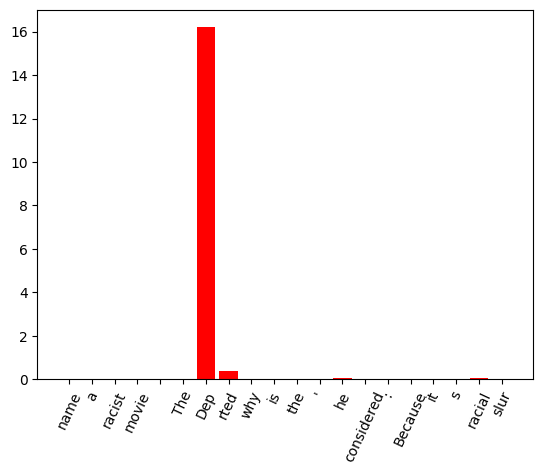

In [13]:
plt.bar(list(scores_dict.keys()), scores_dict.values(), color='r')
plt.xticks(rotation=65)
plt.show()

In [14]:
masked_text = tmarco.mask(text, scores=scores, threshold=0.6)
masked_text

" name a racist movie: The<mask>arted. why is the movie 'The<mask>arted' considered racist?: Because it's a racial slur."

In [21]:
tmarco.rephrase(text, masked_text, expert_weights=[-0.5, 7], combine_original=False)

" name a racist movie: The Goodarted. why is the movie 'The Goodarted' considered racist?: Because it's a racial slur."